# Aula 03 \ 
Nesta aula veremos:

Numpy arrays e pandas Dataframes \
Open and export files \
Conditional Statements \
Loops em Python \
Functions - def 

# 1.1 Numpy arrays

In [42]:
# lembrar de importar as bibliotecas
import numpy as np

# Criando um vetor de dados aleatórios
data = np.random.rand(1000,2)

# Verificando o tamanho do vetor
print(data.shape)
print(np.size(data))

# Print de uma amostra dos dados
print(data[0:10])
print(data[0:10].shape)

(1000, 2)
2000
[[0.59109954 0.3566355 ]
 [0.04727979 0.84554765]
 [0.26444922 0.92848437]
 [0.74670979 0.69081404]
 [0.67017532 0.81251746]
 [0.49244808 0.46828176]
 [0.10127337 0.84523156]
 [0.85042822 0.87960854]
 [0.17434937 0.24318685]
 [0.70530042 0.17745702]]
(10, 2)


In [43]:
# Usando Monte-Carlo
# Colocando um limite de data para pegar os intervalos
dataMax = 1000
dataMin = 10
data = (dataMax - dataMin)*data + dataMin
print(data[0:10])

[[595.18854406 363.06914275]
 [ 56.80698965 847.09216952]
 [271.80472326 929.19952315]
 [749.24268954 693.90590317]
 [673.47356774 814.39228492]
 [497.52359898 473.59893842]
 [110.26063777 846.77924089]
 [851.92394126 880.81245103]
 [182.60587199 250.75498118]
 [708.24741823 185.68245004]]


<class 'numpy.ndarray'>


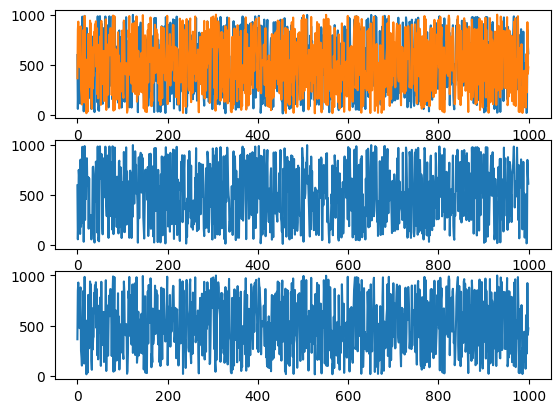

In [44]:
# bibliotecas que são baixadas para ser possível o uso nos códigos 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3)
ax[0].plot(data)
ax[1].plot(data[:,0])
ax[2].plot(data[:,1])
print(type(data))

In [45]:
# Criando um dado 2D 
data3d = np.sin(np.random.rand(1000,1000))
print(data3d)

[[0.27451588 0.07982575 0.10486732 ... 0.83583471 0.51641137 0.49496539]
 [0.83371889 0.78312585 0.45971855 ... 0.19522339 0.35786491 0.82986117]
 [0.79321333 0.63668761 0.7714363  ... 0.32210365 0.19511461 0.60727929]
 ...
 [0.83368809 0.62469858 0.56901643 ... 0.29175297 0.20794648 0.09307154]
 [0.05069642 0.82099245 0.1797882  ... 0.7016039  0.767923   0.07722435]
 [0.06912662 0.07115661 0.66185897 ... 0.18624183 0.24732325 0.28155929]]


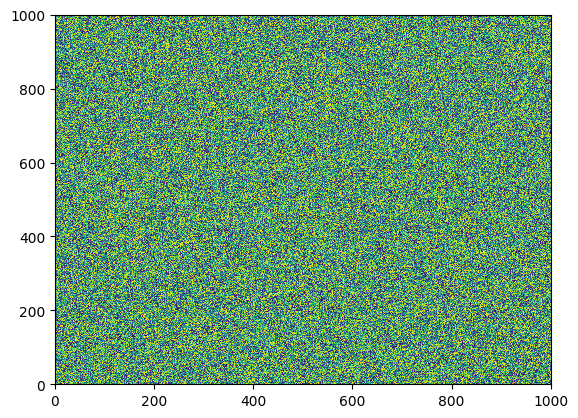

In [46]:
# Plotando um dado 3D
fig2, ax2 = plt.subplots()
ax2.pcolor(data3d)

In [47]:
# Criando vertor temporal
dtime = np.arange(np.datetime64("2022-01-01"), np.datetime64("2023-01-01"), np.timedelta64(1, "h"))
print(dtime[1:10])
print(dtime.shape)
print(type(dtime))

['2022-01-01T01' '2022-01-01T02' '2022-01-01T03' '2022-01-01T04'
 '2022-01-01T05' '2022-01-01T06' '2022-01-01T07' '2022-01-01T08'
 '2022-01-01T09']
(8760,)
<class 'numpy.ndarray'>


# Pandas

In [48]:
import pandas as pd

# Criando um dataframe
df = pd.DataFrame()

In [49]:
# Monstrando um dataframe
df['datetime'] = dtime

In [50]:
# Criando uma coluna random dentro do dataframe df
df['random'] = np.random.rand(df.shape[0])

In [51]:
df['random'][1:10]

1    0.639106
2    0.063246
3    0.338334
4    0.746033
5    0.817991
6    0.169086
7    0.191415
8    0.881304
9    0.688722
Name: random, dtype: float64

In [52]:
# Indexação
df.iloc[:,0]

0      2022-01-01 00:00:00
1      2022-01-01 01:00:00
2      2022-01-01 02:00:00
3      2022-01-01 03:00:00
4      2022-01-01 04:00:00
               ...        
8755   2022-12-31 19:00:00
8756   2022-12-31 20:00:00
8757   2022-12-31 21:00:00
8758   2022-12-31 22:00:00
8759   2022-12-31 23:00:00
Name: datetime, Length: 8760, dtype: datetime64[s]

In [53]:
# Colocando o datetime como index
df = df.set_index(df['datetime'])
df

,datetime,random
datetime,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.689094
2022-01-01 01:00:00,2022-01-01 01:00:00,0.639106
2022-01-01 02:00:00,2022-01-01 02:00:00,0.063246
2022-01-01 03:00:00,2022-01-01 03:00:00,0.338334
2022-01-01 04:00:00,2022-01-01 04:00:00,0.746033
...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.759202
2022-12-31 20:00:00,2022-12-31 20:00:00,0.667305
2022-12-31 21:00:00,2022-12-31 21:00:00,0.493219


In [54]:
# Criando colunas com ano, mês e dia
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

(8760,)


<Axes: xlabel='datetime'>

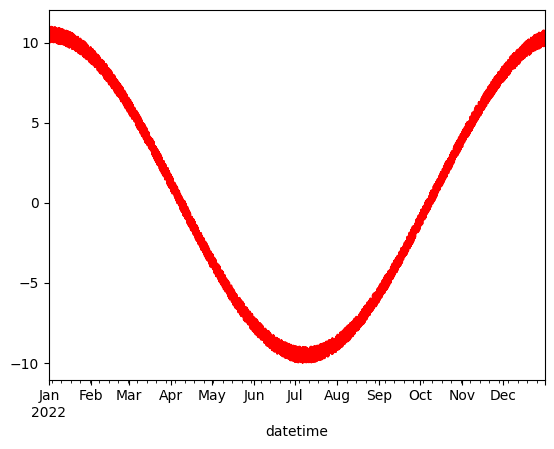

In [55]:
tt = np.arange(0,df.shape[0],1)
print(tt.shape)
df['sazonal'] = (np.cos(tt/(360*4)))
df['timeSeries'] = 10*df['sazonal']+df['random']
#df['sazonal'].plot()
df['timeSeries'].plot(color='red')

In [56]:
df

,datetime,random,year,month,day,sazonal,timeSeries
datetime,,,,,,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.689094,2022,1,1,1.000000,10.689094
2022-01-01 01:00:00,2022-01-01 01:00:00,0.639106,2022,1,1,1.000000,10.639104
2022-01-01 02:00:00,2022-01-01 02:00:00,0.063246,2022,1,1,0.999999,10.063237
2022-01-01 03:00:00,2022-01-01 03:00:00,0.338334,2022,1,1,0.999998,10.338313
2022-01-01 04:00:00,2022-01-01 04:00:00,0.746033,2022,1,1,0.999996,10.745994
...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.759202,2022,12,31,0.979401,10.553209
2022-12-31 20:00:00,2022-12-31 20:00:00,0.667305,2022,12,31,0.979541,10.462713
2022-12-31 21:00:00,2022-12-31 21:00:00,0.493219,2022,12,31,0.979680,10.290022


In [57]:
# Salvar meu dataframe
#inverter a barra nos diretorios

df.to_csv(r'I:\airpolution\dados\noisa_2022.csv')

In [58]:
# Criando uma função
def noiseCreation(path, year):
    """Esta função cria um ruido com sazonalidade.
    Inputs:
        path = asdasdas
        year = asdasdasdas

    Criado por Leonardo
    """
    
    # Criando um dataframe
    df = pd.DataFrame()
    
    # Criando vertor temporal
    dtime = np.arange(np.datetime64(str(year)+"-01-01"), np.datetime64(str(year+1)+"-01-01"), np.timedelta64(1, "h"))
    
    # Monstrando um dataframe
    df['datetime'] = dtime
        
    # Datetime como index do dataframe
    df = df.set_index(df['datetime'])
    
    # Criando colunas com ano, mês e dia
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    
    # Crio uma coluna random
    df['random'] = np.random.rand(df.shape[0])
    
    # Adicionar sazonalidade
    tt = np.arange(0,df.shape[0],1)
    print(tt.shape)
    df['sazonal'] = (np.cos(tt/(360*4)))
    df['timeSeries'] = 10*df['sazonal']+df['random']
    #df['sazonal'].plot()
    df['timeSeries'].plot(color='red')
    df.to_csv(path+'/noise_'+str(year)+'.csv')
    
    return df

(8760,)


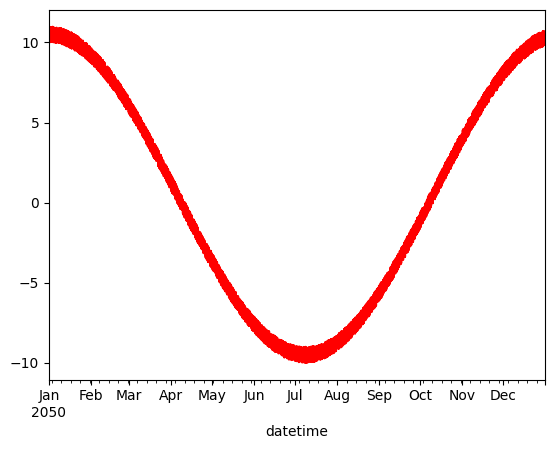

In [59]:
path = 'I:/airpolution/dados/brutos'
df2 = noiseCreation(path,2050)

2002
(8760,)
2003
(8760,)
2004
(8784,)
2005
(8760,)
2006
(8760,)
2007
(8760,)
2008
(8784,)
2009
(8760,)


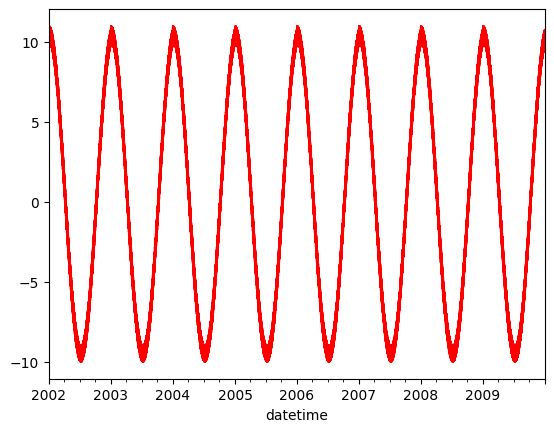

In [60]:
# Primeira opção de loop
for ii in range(2002,2010):
    print(ii)
    df = noiseCreation(path,ii)

In [61]:
df

,datetime,year,month,day,random,sazonal,timeSeries
datetime,,,,,,,
2009-01-01 00:00:00,2009-01-01 00:00:00,2009,1,1,0.822819,1.000000,10.822819
2009-01-01 01:00:00,2009-01-01 01:00:00,2009,1,1,0.199324,1.000000,10.199321
2009-01-01 02:00:00,2009-01-01 02:00:00,2009,1,1,0.151393,0.999999,10.151383
2009-01-01 03:00:00,2009-01-01 03:00:00,2009,1,1,0.404093,0.999998,10.404072
2009-01-01 04:00:00,2009-01-01 04:00:00,2009,1,1,0.265015,0.999996,10.264976
...,...,...,...,...,...,...,...
2009-12-31 19:00:00,2009-12-31 19:00:00,2009,12,31,0.559956,0.979401,10.353963
2009-12-31 20:00:00,2009-12-31 20:00:00,2009,12,31,0.269198,0.979541,10.064606
2009-12-31 21:00:00,2009-12-31 21:00:00,2009,12,31,0.761382,0.979680,10.558184


2001
2030
2032
(8784,)
2053
(8760,)
2060
(8784,)


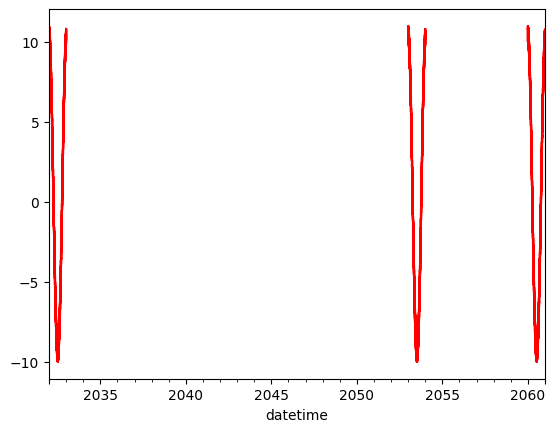

In [62]:
anos = [2001,2030,2032,2053,2060]

for ano in anos:
    print(ano)
    if ano > 2030:
        df = noiseCreation(path,ano)

In [63]:
import os
files = os.listdir(path)
print(files)

allData = []
for file in files:
    if file.endswith('.csv'):
        print(file)
        data = pd.read_csv(path+'/'+file)
        allData.append(data)

['noise_2002.csv', 'noise_2003.csv', 'noise_2004.csv', 'noise_2005.csv', 'noise_2006.csv', 'noise_2007.csv', 'noise_2008.csv', 'noise_2009.csv', 'noise_2032.csv', 'noise_2050.csv', 'noise_2053.csv', 'noise_2060.csv']
noise_2002.csv
noise_2003.csv
noise_2004.csv
noise_2005.csv
noise_2006.csv
noise_2007.csv
noise_2008.csv
noise_2009.csv
noise_2032.csv
noise_2050.csv
noise_2053.csv
noise_2060.csv


In [64]:
allDataDf = pd.concat(allData)

In [65]:
allDataDf

,datetime,datetime.1,year,month,day,random,sazonal,timeSeries
0,2002-01-01 00:00:00,2002-01-01 00:00:00,2002,1,1,0.153751,1.000000,10.153751
1,2002-01-01 01:00:00,2002-01-01 01:00:00,2002,1,1,0.095241,1.000000,10.095239
2,2002-01-01 02:00:00,2002-01-01 02:00:00,2002,1,1,0.930479,0.999999,10.930470
3,2002-01-01 03:00:00,2002-01-01 03:00:00,2002,1,1,0.545726,0.999998,10.545704
4,2002-01-01 04:00:00,2002-01-01 04:00:00,2002,1,1,0.268275,0.999996,10.268237
...,...,...,...,...,...,...,...,...
8779,2060-12-31 19:00:00,2060-12-31 19:00:00,2060,12,31,0.769239,0.982630,10.595539
8780,2060-12-31 20:00:00,2060-12-31 20:00:00,2060,12,31,0.738394,0.982759,10.565980
8781,2060-12-31 21:00:00,2060-12-31 21:00:00,2060,12,31,0.674754,0.982887,10.503622
8782,2060-12-31 22:00:00,2060-12-31 22:00:00,2060,12,31,0.827353,0.983014,10.657498
